### The Time Machine (loaded)

In [1]:
import sys
sys.path.insert(0, '..')

import collections
import re
with open('data/timemachine.txt', 'r') as f:
    lines = f.readlines()
    raw_dataset = [re.sub('[^A-Za-z]+', ' ', st).lower().split() for st in lines]

# Let's read the first 10 lines of the text    
for st in raw_dataset[8:10]:
    print('# tokens:', len(st), st)        

# tokens: 13 ['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
# tokens: 12 ['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']


### Word Counts

In [2]:
counter = collections.Counter([tk for st in raw_dataset for tk in st])
print("frequency of 'traveller':", counter['traveller'])
# Print the 10 most frequent words with word frequency count
print(counter.most_common(10))

frequency of 'traveller': 61
[('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440)]


### Frequency Statistics

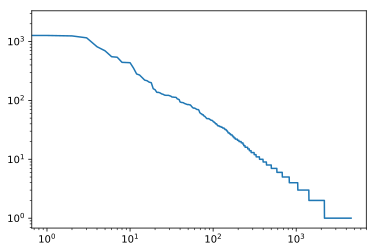

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

wordcounts = [count for _,count in counter.most_common()]
plt.loglog(wordcounts);

### Zipf's Law

$$n(x) \propto (x + c)^{-\alpha} \text{ and hence }
\log n(x) = -\alpha \log (x+c) + \mathrm{const.}$$

Does it work for word pairs, too?

In [4]:
wseq = [tk for st in raw_dataset for tk in st]
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print('Beginning of the book\n', word_pairs[:10])
counter_pairs = collections.Counter(word_pairs)
print('Most common word pairs\n', counter_pairs.most_common(10))

Beginning of the book
 [('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'wells'), ('wells', 'i'), ('i', 'the'), ('the', 'time'), ('time', 'traveller')]
Most common word pairs
 [(('of', 'the'), 309), (('in', 'the'), 169), (('i', 'had'), 130), (('i', 'was'), 112), (('and', 'the'), 109), (('the', 'time'), 102), (('it', 'was'), 99), (('to', 'the'), 85), (('as', 'i'), 78), (('of', 'a'), 73)]


### Frequency Statistics

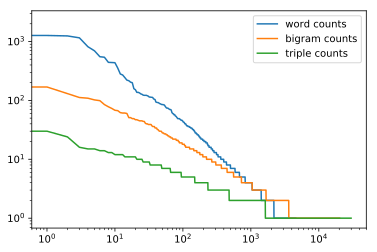

In [5]:
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
counter_triples = collections.Counter(word_triples)

bigramcounts = [count for _,count in counter_pairs.most_common()]
triplecounts = [count for _,count in counter_triples.most_common()]
plt.loglog(wordcounts, label='word counts');
plt.loglog(bigramcounts, label='bigram counts');
plt.loglog(triplecounts, label='triple counts');
plt.legend();